# Import Statements #

In [54]:
import numpy as np
#from numba import cuda
import matplotlib.pyplot as plt
from numpy import random
from multiprocessing.pool import ThreadPool as Pool
import time


# Classes #

In [55]:
#parent class for animals
class Animal:
  def __init__ (self,id, hungerRate, birthRate, currLife, moveSpeed, speedModifier, rowPosition, columnPosition):
    self.id=id
    self.hungerRate=hungerRate
    self.birthRate=birthRate
    self.currLife=currLife
    self.moveSpeed=moveSpeed
    self.speedModifier=speedModifier
    self.rowPosition=rowPosition
    self.columnPosition=columnPosition
    
    #adjacent tiles at any given spot
    self.moveOptions = [[-1,-1],[0,-1],[1,-1],[-1,0],[1,0],[-1,1],[0,1],[1,1]]
    

  def die(self,Grid,thisarr,otherarr):
    # print("There is death")
    #remove from grid and remove from the list
    setattr(Grid[self.rowPosition][self.columnPosition], "myAnimal", None)
    thisarr = np.delete(thisarr , self.id)
    returnlist = [Grid,thisarr,otherarr]
    return returnlist
    
  def breed(self,Grid,numRows, numCols,animalArr,otherArr):
    #moved into one of our own and TotalPopuation < MaxPopulation - 1
    #spawn new animalType in free adjacent cell
    #breed chance
    toBirth = False

    rand = random.random()

    if rand<=self.birthRate:
      toBirth = True

    #spawn child
    if (toBirth):

      moveOptionsCopy = self.moveOptions.copy()
      validMoveOptions = moveOptionsCopy.copy()
      count = 0

      
      #remove invalid moves from validMoveOptions
      for i in moveOptionsCopy:
        xpos = i[0]
        ypos = i[1]
        
        #if the adjacent cell is out of bounds then remove that from option
        if self.rowPosition + xpos <= -1 or self.rowPosition + xpos >= numRows or self.columnPosition + ypos <= -1 or self.columnPosition + ypos >= numCols:
          validMoveOptions.pop(count) 
          continue
        #if the adjacent cell is occupied
        if getattr(Grid[self.rowPosition+xpos][self.columnPosition+ypos],'myAnimal') != None:
          validMoveOptions.pop(count)
          continue
        count += 1
      
      if (len(validMoveOptions)>0):  
        BirthOption = random.randint(len(validMoveOptions))

       
        Move = validMoveOptions[BirthOption]

        deltaX = self.rowPosition + Move[0]
        deltaY = self.columnPosition + Move[1]

        # print (f"I'm breeding to {deltaX}, {deltaY}")

        if type(self).__name__ == "Wolf":
          #spawn new wolf
          newID = len(animalArr)
          babyWolf = Wolf(newID,self.hungerRate,self.birthRate,self.currLife,self.moveSpeed,self.speedModifier,deltaX,deltaY)
          setattr(Grid[deltaX][deltaY], 'myAnimal', babyWolf)
          animalArr = np.append(animalArr, babyWolf)
          returnList = [Grid,animalArr,otherArr]
          return returnList
        else :
          #spawn new sheep
          newID = len(animalArr)
          babySheep = Sheep(newID,self.hungerRate,self.birthRate,self.currLife,self.moveSpeed,self.speedModifier,deltaX,deltaY)
          animalArr = np.append(animalArr,babySheep)
          setattr(Grid[deltaX][deltaY], 'myAnimal', babySheep)
          returnList = [Grid,animalArr,otherArr]
          return returnList
      else:
        #there is no available space to breed to
        returnList = [Grid,animalArr,otherArr]
        return returnList

  def move(self, Grid, xBound, yBound,thisarr,otherarr):
    
    cont=True
    movesRemaining=self.moveSpeed

    
    newX=-1
    newY=-1
    while movesRemaining>0:
      if self.currLife == 0:
        # print ('I have reached the end of my life by moving')
        return self.die(Grid,thisarr,otherarr)
      movesCopy=self.moveOptions.copy()

      while cont:
        index=random.randint(len(movesCopy))
        newX=self.rowPosition+movesCopy[index][0]
        newY=self.columnPosition+movesCopy[index][1]
        if newX < 0 or newY < 0 or newX >= xBound or newY >= yBound:
          movesCopy.pop(index)
        else:
          cont=False

      # print (f"I'm moving to {newX}, {newY}")
      if getattr(Grid[newX][newY],'myAnimal') == None:
        setattr(Grid[newX][newY], "myAnimal", self)
        setattr(Grid[self.rowPosition][self.columnPosition], "myAnimal", None)
        self.rowPosition=newX
        self.columnPosition=newY

        #if i am sheep i will eat grass
        if (type(self).__name__) == 'Sheep':
          self.hungerRate = 1

        self.currLife -= (self.hungerRate)
        movesRemaining -= 1
      elif type(getattr(Grid[newX][newY], "myAnimal")).__name__ == type(self).__name__:
        movesRemaining=0
        return self.breed(Grid, xBound, yBound,thisarr,otherarr)
        
      else:
        movesRemaining=0
        if type(getattr(Grid[newX][newY],'myAnimal')).__name__ == "Wolf":
          ranIntoWolf = getattr(Grid[newX][newY],'myAnimal')
          ranIntoWolf.freefood()
          return self.die(Grid,thisarr,otherarr)
        else:
          return self.eat(Grid,thisarr,otherarr,newX,newY)
    returnList = [Grid,thisarr,otherarr]
    self.hungerRate += 1
    return returnList
      
  def __str__(self):
    return f"id:{self.id}, position:({self.rowPosition},{self.columnPosition}), hungerRate:{self.hungerRate}, breedRate:{self.birthRate}, currLife:{self.currLife}, moveSpeed:{self.moveSpeed}, speedModifier:{self.speedModifier}"
  
class simObj:
  def __init__(self, numSteps, numRow, numCol, numPrey, numPred):
    self.numSteps=numSteps
    self.numRow=numRow
    self.numCol=numCol
    self.numPrey=numPrey
    self.numPred=numPred
  

# class simRunner:
#   def __init__():
#     pass





In [56]:
#class for prey
class Sheep(Animal):
    def __init__ (self, id, hungerRate, birthRate, currLife, moveSpeed, speedModifier, rowPosition, columnPosition):
        super().__init__(id,hungerRate, birthRate, currLife, moveSpeed, speedModifier, rowPosition, columnPosition)
    
    def eat(self):
        # print("yum!")
        pass

In [57]:
#class for predator
class Wolf(Animal):
    def __init__ (self, id, hungerRate, birthRate, currLife, moveSpeed, speedModifier, rowPosition, columnPosition):
        super().__init__(id,hungerRate, birthRate, currLife, moveSpeed, speedModifier, rowPosition, columnPosition)
    
    def eat(self,Grid,thisarr,otherarr,newX,newY):
        self.hungerRate = 1
        # print("there is food")
        #get id of prey
        prey = getattr(Grid[newX][newY], "myAnimal")
        preyID = getattr(prey,'id')
        #move into the new position
        setattr(Grid[newX][newY], "myAnimal", self)
        setattr(Grid[self.rowPosition][self.columnPosition], "myAnimal", None)
        self.rowPosition=newX
        self.columnPosition=newY
        otherarr = np.delete(otherarr,preyID)
        returnlist = [Grid,thisarr,otherarr]
        return returnlist

    def freefood(self):
        #if free food walks into you you are no longer hungry
        self.hungerRate = 1

        

In [58]:
#class for each grid spot
class Grass:
  def __init__(self, hasFood, growthRate, myAnimal):
    self.hasFood= hasFood
    self.growthRate= growthRate
    self.myAnimal= myAnimal
  
  def __str__(self):
    return f"{type(self.myAnimal).__name__}"

# Serial Simulation #

In [59]:
def Simulation(numRuns, numRows, numCols, preySize, predatorSize):
    #Initialize Field
    #numRows = 5
    #self.numCols = 5
    #self.numRuns=numRuns

    Grid = np.empty((numRows,numCols), dtype= Grass)

    ## print(Grid)

    #Initialize Grass in each field

    hasFood = True
    growthRate = 1.0
    myAnimal = None

    for i in range(numRows):
        for j in range(numCols):
            Grid[i][j] = Grass(hasFood,growthRate,myAnimal)

    #Initialize Prey
    # preySize = 10

    preyArr = np.empty([preySize], dtype=Sheep)

    hungerRate = 1
    birthRate = 1.0
    currLife = 10
    moveSpeed = 1
    speedModifier = 1

    for i in range(preySize):
        #randomly generate x,y coordinates
        rowPosition = random.randint(numRows)
        columnPosition = random.randint(numCols)
        
        #if that spot already has animal then generate again
        while (getattr(Grid[rowPosition][columnPosition],'myAnimal') != None):
            rowPosition = random.randint(numRows)
            columnPosition = random.randint(numCols)

        #update grid
        preyArr[i] = Sheep(i,hungerRate, birthRate, currLife, moveSpeed, speedModifier, rowPosition, columnPosition)
        setattr(Grid[rowPosition][columnPosition], 'myAnimal', preyArr[i])
    


    #Initialize Predator
    # predatorSize = 5

    predatorArr = np.empty([predatorSize], dtype=Wolf)

    hungerRate = 1
    birthRate = 1.0 
    currLife = 10
    moveSpeed = 1
    speedModifier = 1.0

    for i in range(predatorSize):
        rowPosition = random.randint(numRows)
        columnPosition = random.randint(numCols)
        
        #if that spot already has animal then generate again
        while (getattr(Grid[rowPosition][columnPosition],'myAnimal') != None):
            rowPosition = random.randint(numRows)
            columnPosition = random.randint(numCols)

        #update grid
        predatorArr[i] = Wolf(i,hungerRate, birthRate, currLife, moveSpeed, speedModifier, rowPosition, columnPosition)
        setattr(Grid[rowPosition][columnPosition], 'myAnimal', predatorArr[i])

    # initialize populations

    MaxPopulation = numRows * numCols
    TotalPopulation = predatorSize + preySize


    #for i in range(numRows):
        # print("\n")
        #for j in range(numCols):
              # print(Grid[i][j],end= " "),


    # numRuns = 5

    for j in range(numRuns):
        if TotalPopulation>=MaxPopulation:
            TotalPopulation=MaxPopulation
            break

        #if (j == 1):
            # print("\n")
            # print ("second set of moves")
        #every sheep gets a move
        for i in preyArr:
            testx = getattr(i, 'rowPosition')
            testy = getattr(i, 'columnPosition')
            # print('\n')
            # print('picked prey @')
            # print(f"{testx}, {testy}")
            
            returnvalue= i.move(Grid, numRows, numCols,preyArr,predatorArr)
            Grid = returnvalue[0]
            preyArr = returnvalue[1]
            predatorArr = returnvalue[2]

            #update ID 
            for i in range(len(preyArr)):
                setattr(preyArr[i], 'id', i)
            for i in range(len(predatorArr)):
                setattr(predatorArr[i], 'id', i)
            
            #for i in range(numRows):
                # print("\n")
                #for j in range(numCols):
                    # print(Grid[i][j],end= " "),

        #every wolf grets a move
        for i in predatorArr:
            testx = getattr(i, 'rowPosition')
            testy = getattr(i, 'columnPosition')
            # print('\n')
            # print('picked predator @')
            # print(f"{testx}, {testy}")
            
            returnvalue= i.move(Grid, numRows, numCols,predatorArr,preyArr)
            Grid = returnvalue[0]
            predatorArr = returnvalue[1]
            preyArr = returnvalue[2]

            #update ID 
            for i in range(len(preyArr)):
                setattr(preyArr[i], 'id', i)
            for i in range(len(predatorArr)):
                setattr(predatorArr[i], 'id', i)
            
        TotalPopulation=len(predatorArr)+len(preyArr)    
        #print(TotalPopulation)  
        
            #for i in range(numRows):
                # print("\n")
                #for j in range(numCols):
                    # print(Grid[i][j],end= " "),
    return [len(preyArr),len(predatorArr)]
        

Assumptions:

* There is infinite food for the sheep so their hunger always stays constant


In [60]:
Simulation(5, 20, 20, 20, 20)

[16, 25]

# Multiprocessing (Pool)
got help from this site https://jupyter-tutorial.readthedocs.io/en/stable/performance/multiprocessing.html


In [61]:
# function that takes a simObject and runs a simulation with parameters corresponding to the object's variables.  Allows Simulation to be
# mapped to a list of sim objects
def unpackRun(simObj):
    return Simulation(simObj.numSteps, simObj.numRow, simObj.numCol, simObj.numPrey, simObj.numPred)


#parallel function that runs simualtions
def parallel_sim(numSteps, numRow, numCol, numPrey, numPred, numSims, numThreads):
    #chunks=numThreads//32
    #create a pool of threads for each simulation we want to run
    p=Pool(numThreads)
    

    # create an empty list to fill with sim objects
    runs=[]

    # for the number of simulations...
    for x in range(numSims):
        # ...add a new simObj to runs with the passed in parameters
        runs.append(simObj(numSteps, numRow, numCol, numPrey, numPred))

    # result = p.map_async(unpackRun, runs)
    # print(result.get())
    parallelresults =  p.imap_unordered(unpackRun, runs)
    #for each item in the list returned by mapping unpackRun on runs...
    for x in parallelresults:
        continue
        #...print element x
        #print(x)

# Serial vs. Parallel Version of Multiple runs

In [62]:
numSims = [50,100,250,500]
serialTimes = np.zeros(shape=len(numSims))
parallelTimes = np.zeros(shape=len(numSims))



In [63]:
#serial run


runs=[]
count = 0
# for the number of simulations...
for x in numSims:
    runs=[]
    #start recording time
    start = time.time()

    for y in range(x):
        # ...add a new simObj to runs with the passed in parameters
        runs.append(simObj(5, 20, 20, 20, 20))
        for x in runs:
            unpackRun(x)
    #stop recording time
    end = time.time()
    serialTimes[count] = end-start
    count += 1

In [72]:
#Parallel run
count = 0
for x in numSims:
    start = time.time()
    #threads are set to 4
    parallel_sim(5, 20, 20, 20, 20, x,4)
    end = time.time()
    parallelTimes[count]= end-start 
    count +=1

In [65]:
print (parallelTimes)

[0.08706403 0.165694   0.47122478 0.90848899]


In [68]:
print(serialTimes)

[  2.35438514   8.80830002  54.37931085 218.44877696]


# Graphing Things #

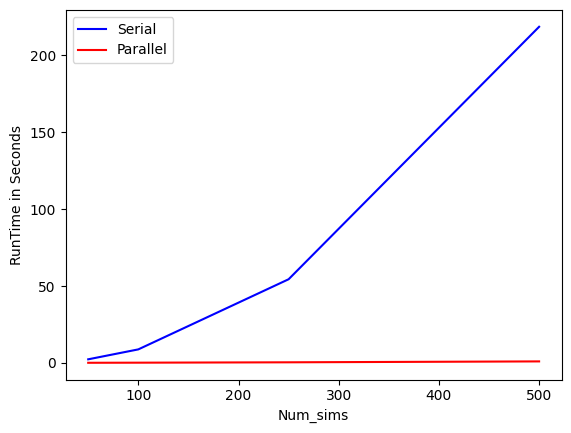

In [76]:
y= numSims
x = serialTimes
z = parallelTimes

plt.plot(y, x, "-b", label="Serial")
plt.plot(y, z, "-r", label="Parallel")
plt.xlabel("Num_sims")
plt.ylabel("RunTime in Seconds")
plt.legend(loc="upper left")

plt.show()

Text(0, 0.5, 'RunTime in Seconds')

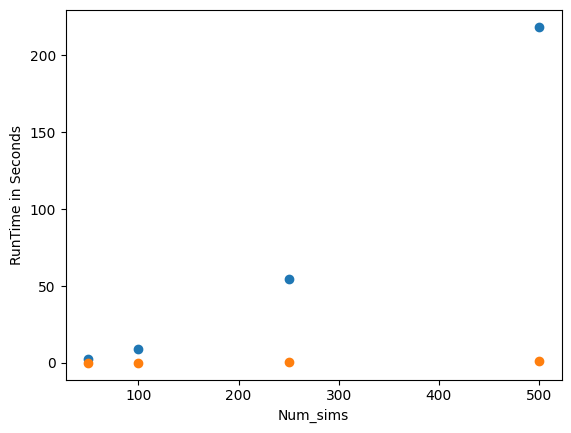

In [82]:
plt.scatter(y,x)
plt.scatter(y,z)
plt.xlabel("Num_sims")
plt.ylabel("RunTime in Seconds")

Report: 

From our testing we can see that the parallel version of running simulations are way faster than serial. We tried using CUDA initially but realised it was futile to try to do so as our simulations do not represent the SIMD format CUDA is based on. We then parallelised our simunlation by using a python package multiprocessing where we ran the serial simulations in parallel on multiple threads.

For our resultant graph we ran simulations for 50,100,250,500 times for both parallel and serial and timed it. The results can be seen in the graph above.

# CUDA Kernel (Failed) #

Documentation: https://numba.readthedocs.io/en/stable/cuda/index.html

In [308]:
@cuda.jit
def Prey_Predator(numRuns, numRows, numCols, preySize, predatorSize, prey_results, predator_results, results):
    # Thread id in a 1D block
    # Simulation ID
    id = cuda.threadIdx.x
    
    

    preyPopulation = results[0]
    predatorPopulation = results[1]

    #after simulation
    prey_results[id]=preyPopulation
    predator_results[id]=predatorPopulation

    cuda.syncthreads()

    
    

In [306]:
@cuda.jit(device=True)
def device_simulation(numRuns, numRows, numCols, preySize, predatorSize):
    return Simulation(numRuns, numRows, numCols, preySize, predatorSize)

In [ ]:
# only using 1 block but many threads
# number of threads
num_simulations = 32
num_block = 1

prey_results = cuda.to_device(np.zeros(num_simulations))
# print(prey_results)
predator_results = cuda.to_device(np.zeros(num_simulations))
# print(len(predator_results))


#copy to device
#dprey_results = cuda.device_array_like(prey_results)
#dpredator_results = cuda.device_array_like(predator_results)


#kernel call

numRuns = 5
numRows = 5
numCols = 5
preySize = 10
predatorSize = 5
results=cuda.to_device(np.zeros(2))

Prey_Predator[num_block, num_simulations](numRuns, numRows, numCols, preySize, predatorSize, prey_results, predator_results, results)

#get results to host
prey_results = prey_results.copy_to_host()
predator_results = predator_results.copy_to_host()
print(prey_results)
print(predator_results)